<h1>ANN called LSTM to predict the closing price of AAPL using past 60 days</h1>

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime as dt

In [0]:
#Stock Quotes

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end =dt.datetime.today())

In [6]:
df.shape

(2055, 6)

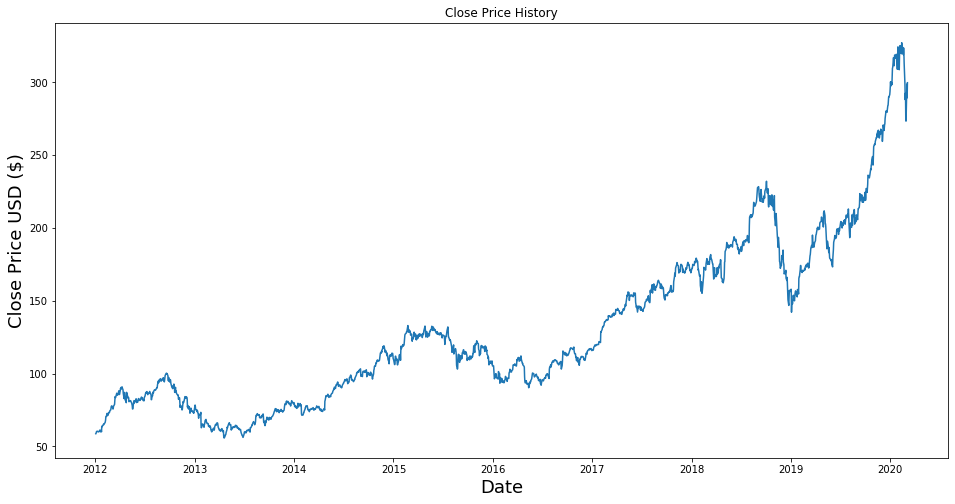

In [8]:
#Visualize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['Close'])
plt.show()

In [9]:
#Only the 'Close' column
data = df.filter(['Close'])

#Convert dataframe to a numpy array
dataset = data.values

#Number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

print(training_data_len)

1644


In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.89539806],
       [0.86043254],
       [0.89878781]])

In [14]:
#Scaled training dataset (All columns)
train_data = scaled_data[0:training_data_len, :]

#Split the data into X_train and y_train

#Independent/features
X_train = []

#Target/response/dependent
y_train = []

for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i <= 60:
    print(X_train)
    print(y_train)
    print('\n')

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]




In [0]:
#Convert the training data into numpy arrays
X_train,y_train = np.array(X_train), np.array(y_train)

In [20]:
#Reshape the data

#number of rows, number of columns, closing price
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1584, 60, 1)

<h1>Build the LSTM</h1>

In [0]:
model = Sequential()

#1st Layer
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1))) #50 neurons

#2nd Layer
model.add(LSTM(50,return_sequences=False)) #50 neurons

#3rd Layer
model.add(Dense(25)) #25 neurons

#4th Layer
model.add(Dense(1)) #1 neuron

In [0]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
#Train the model with training sets
#batch_size = Total number of training examples in one batch
#epochs = number of iterations when dataset is passed back and forth through NN
model.fit(X_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1584/1584 [==============================] - 109s 69ms/step - loss: 7.7753e-04


In [0]:
#Testing dataset
#New array containing scaled values from index 1543-2003
test_data = scaled_data[training_data_len-60:,:]

#Create X_test and y_test
X_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  X_test.append(test_data[i-60:i,0])

In [0]:
#Convert the data to a numpy array
X_test = np.array(X_test)

#LSTM expects 3D data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [0]:
#Predicted price values
#Predictions should mostly match y_test

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

In [31]:
#Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

print('Root Mean Square Error: ', rmse)

Root Mean Square Error:  6.157136012167826


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


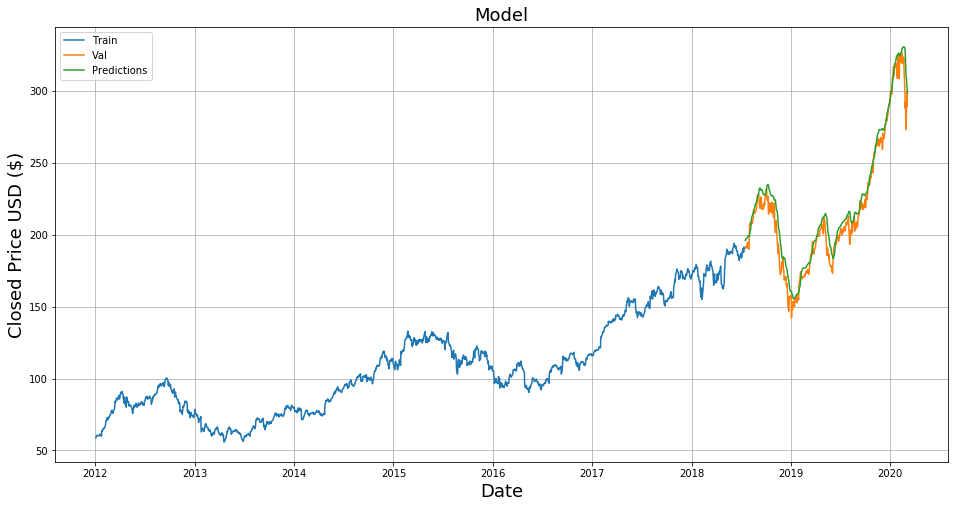

In [39]:
#Visualize Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='best')
plt.grid()
plt.show()

In [35]:
#Actual Price
valid

,Close,Predictions
Date,,
2018-07-17,191.449997,196.047241
2018-07-18,190.399994,196.626678
2018-07-19,191.880005,197.002747
2018-07-20,191.440002,197.372482
2018-07-23,191.610001,197.657425
...,...,...
2020-02-27,273.519989,317.235046
2020-02-28,273.359985,310.968140
2020-03-02,298.809998,304.531067


In [0]:
#Get the Quote
aapl_quote = web.DataReader('AAPL',
                            data_source='yahoo',
                            start='2012-01-01',
                            end=dt.datetime.today()
                            )

df = aapl_quote.filter(['Close'])

#Last 60 days
last_60_days = df[-60:].values

#Scale data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

#3D data for LSTM
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Predicted scaled price
predicted_price = model.predict(X_test)

predicted_price = scaler.inverse_transform(predicted_price)

In [52]:
#Get the quote
aapl_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')

aapl_quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,281.899994,279.119995,279.799988,279.73999,29007100,279.077667
